In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
c_code_file = "../data/Countries Codes.csv"
life_file  = "../data/Life Expectancy Data.csv"
countries_file = "../data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

In [38]:
life_df = pd.read_csv(life_file)
code_df = pd.read_csv(c_code_file)
countries_gdf = gpd.read_file(countries_file)

**removing all columns extra space**

## Test 

This is a simple note for creating a para.

In [4]:
life_df.columns = life_df.columns.str.strip()
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
life_df["Schooling"]

0       10.1
1       10.0
2        9.9
3        9.8
4        9.5
        ... 
2933     9.2
2934     9.5
2935    10.0
2936     9.8
2937     9.8
Name: Schooling, Length: 2938, dtype: float64

In [7]:
school_na_mask =  life_df["Schooling"].isna()
school_na_mask

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Schooling, Length: 2938, dtype: bool

In [10]:
masked_df = life_df[school_na_mask]
masked_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,79.0,5.81,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,83.0,6.14,82.0,2.9,NaN,NaN,5.9,5.9,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.0,92.0,37,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.0,92.0,56,...,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.0,88.0,41,...,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.0,89.0,116,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


In [12]:
masked_df["Country"].value_counts()

Country
Côte d'Ivoire                                           16
Czechia                                                 16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Republic of Moldova                                     16
United Republic of Tanzania                             16
Republic of Korea                                       16
United Kingdom of Great Britain and Northern Ireland    16
Somalia                                                 16
United States of America                                16
Cook Islands                                             1
Monaco                                                   1
Niue                                                     1
Name: count, dtype: int64

In [19]:
life_df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [20]:
countries = life_df["Country"].unique()
len(life_df["Country"].unique())

193

**filling School values as zero**

In [17]:
life_df["Schooling"].fillna(0)
# whenever we apply the fillna method to a series it does not update the original dataset.
# it creates a new copy of data.
# if we want to apply the fill value on the original dataset then we need to use 
# inplace argument

# na check after filling
na_check_data =  life_df["Schooling"].fillna(0)
na_check_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Schooling
Non-Null Count  Dtype  
--------------  -----  
2938 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [18]:
# na check original data without applying the fillna method
life_df["Schooling"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Schooling
Non-Null Count  Dtype  
--------------  -----  
2775 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


Note: still we have na values in original values.

**common and difference selection**

In [21]:
code_df.head()

,Country or Area,M49 code,ISO-alpha3 code
0,Afghanistan,4,AFG
1,Åland Islands,248,ALA
2,Albania,8,ALB
3,Algeria,12,DZA
4,American Samoa,16,ASM


In [24]:
life_df_countries = life_df["Country"].unique()

In [25]:
code_df_countries = code_df["Country or Area"]

In [26]:
type(life_df_countries), type(code_df_countries)

(numpy.ndarray, pandas.core.series.Series)

**converting to set data type**


In [27]:
life_df_countries = set(life_df_countries)
code_df_countries = set(code_df_countries)

In [30]:
# type check for both varaible's data
type(life_df_countries), type(code_df_countries)

(set, set)

**common counries**

In [31]:
# extracting common countries
common_countries =  code_df_countries.intersection(life_df_countries)
print(common_countries)

{'Mali', 'Honduras', 'Benin', 'Greece', 'Monaco', 'United Kingdom of Great Britain and Northern Ireland', 'Niger', 'Barbados', 'United Republic of Tanzania', 'Turkmenistan', 'Kazakhstan', 'Micronesia (Federated States of)', 'Bosnia and Herzegovina', 'Georgia', 'Yemen', 'Republic of Korea', 'Jordan', 'Fiji', 'Albania', 'Thailand', 'Sierra Leone', 'Philippines', 'Republic of Moldova', 'Guinea-Bissau', 'Nepal', 'Democratic Republic of the Congo', 'Cabo Verde', 'Kiribati', 'Australia', 'Bahamas', 'Gambia', 'Saint Vincent and the Grenadines', 'Burundi', 'Sao Tome and Principe', 'Morocco', 'San Marino', 'Brazil', 'Ecuador', 'Romania', 'Algeria', 'Cameroon', 'Sudan', 'Samoa', 'Mexico', 'Congo', 'Maldives', 'South Sudan', 'Papua New Guinea', 'Chad', 'South Africa', 'Tunisia', 'Bhutan', 'Iraq', 'United Arab Emirates', 'Egypt', 'Senegal', 'Nauru', 'Malawi', 'Paraguay', 'Lithuania', 'Namibia', 'Belarus', 'Bolivia (Plurinational State of)', 'Togo', 'Jamaica', 'Armenia', 'Somalia', 'Cuba', 'Burkina

In [32]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [33]:
code_df.head()

,Country or Area,M49 code,ISO-alpha3 code
0,Afghanistan,4,AFG
1,Åland Islands,248,ALA
2,Albania,8,ALB
3,Algeria,12,DZA
4,American Samoa,16,ASM


**renaming a single column**

In [36]:
code_df.rename(columns={"Country or Area": "Country"}, inplace=True)
code_df.head()

,Country,M49 code,ISO-alpha3 code
0,Afghanistan,4,AFG
1,Åland Islands,248,ALA
2,Albania,8,ALB
3,Algeria,12,DZA
4,American Samoa,16,ASM


**merging data**

In [37]:
life_df.merge(code_df, 
              on="Country")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,M49 code,ISO-alpha3 code
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,4,AFG
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,4,AFG
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,4,AFG
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,4,AFG
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,4,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,716,ZWE
2854,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,716,ZWE
2855,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,716,ZWE
2856,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,716,ZWE


In [39]:
countries_gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


<Axes: >

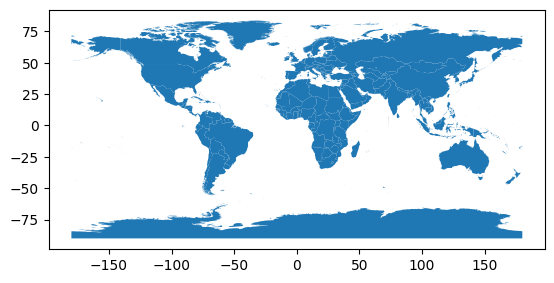

In [40]:
countries_gdf.plot()

In [41]:
# gdf selected columns
gdf_selected_columns = ["NAME", "ISO_A3","geometry"]

In [43]:
selected_countries_gdf =  countries_gdf[gdf_selected_columns]
selected_countries_gdf.head()

,NAME,ISO_A3,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [44]:
selected_countries_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
selected_countries_gdf_utm =  selected_countries_gdf.to_crs("EPSG:32643")
selected_countries_gdf_utm.head()

,NAME,ISO_A3,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((5748373.479 627069.364, 574837..."
1,Malaysia,MYS,"MULTIPOLYGON (((5748373.479 627069.364, 574733..."
2,Chile,CHL,"MULTIPOLYGON (((-3478918.652 -17651091.751, -3..."
3,Bolivia,BOL,"POLYGON ((-3478918.652 -17651091.751, -3478950..."
4,Peru,PER,"MULTIPOLYGON (((-3478918.652 -17651091.751, -3..."


In [47]:
selected_countries_gdf_utm.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

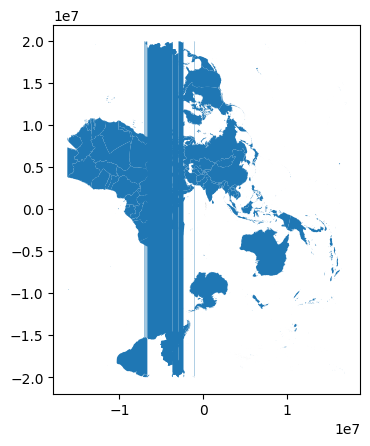

In [48]:
selected_countries_gdf_utm.plot()

In [51]:
rep_points =  selected_countries_gdf.representative_point()
rep_points

0        POINT (113.32523 0.10491)
1        POINT (102.11153 3.98945)
2       POINT (-71.4964 -35.71034)
3       POINT (-64.2858 -16.28784)
4       POINT (-75.76765 -9.18342)
                  ...             
253     POINT (113.55943 22.13618)
254    POINT (123.58635 -12.43255)
255     POINT (-79.98794 15.79558)
256     POINT (-78.63779 15.86565)
257     POINT (117.75383 15.15313)
Length: 258, dtype: geometry

In [52]:
selected_countries_gdf.loc[:,"LONG"] = rep_points.x
selected_countries_gdf.loc[:,"LAT"] = rep_points.y

selected_countries_gdf.head()

G:\WorkData\Programming\Python\GIS Data Science\workspace\gis-env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
G:\WorkData\Programming\Python\GIS Data Science\workspace\gis-env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,NAME,ISO_A3,geometry,LONG,LAT
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",113.325230,0.104906
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",102.111531,3.989447
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",-71.496396,-35.710341
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",-64.285795,-16.287842
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",-75.767650,-9.183418


In [53]:
selected_countries_gdf.head()

,NAME,ISO_A3,geometry,LONG,LAT
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",113.325230,0.104906
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",102.111531,3.989447
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",-71.496396,-35.710341
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",-64.285795,-16.287842
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",-75.767650,-9.183418


**renaming columns**

In [55]:
selected_countries_gdf.rename(columns={"NAME":"Country"}, inplace=True)

C:\Users\manis\AppData\Local\Temp\ipykernel_31992\522301390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_countries_gdf.rename(columns={"NAME":"Country"}, inplace=True)


In [56]:
selected_countries_gdf.head()

,Country,ISO_A3,geometry,LONG,LAT
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",113.325230,0.104906
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",102.111531,3.989447
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",-71.496396,-35.710341
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",-64.285795,-16.287842
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",-75.767650,-9.183418


In [58]:
life_df2 =  life_df.merge(selected_countries_gdf,on="Country")
life_df2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,ISO_A3,geometry,LONG,LAT
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,AFG,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",65.177836,33.932827
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,AFG,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",65.177836,33.932827
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,AFG,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",65.177836,33.932827
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,AFG,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",65.177836,33.932827
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,AFG,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",65.177836,33.932827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,454.366654,12777511.0,9.4,9.4,0.407,9.2,ZWE,"POLYGON ((25.25978 -17.79411, 25.26671 -17.800...",29.328272,-19.007624
2515,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,453.351155,12633897.0,9.8,9.9,0.418,9.5,ZWE,"POLYGON ((25.25978 -17.79411, 25.26671 -17.800...",29.328272,-19.007624
2516,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,57.348340,125525.0,1.2,1.3,0.427,10.0,ZWE,"POLYGON ((25.25978 -17.79411, 25.26671 -17.800...",29.328272,-19.007624
2517,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,548.587312,12366165.0,1.6,1.7,0.427,9.8,ZWE,"POLYGON ((25.25978 -17.79411, 25.26671 -17.800...",29.328272,-19.007624


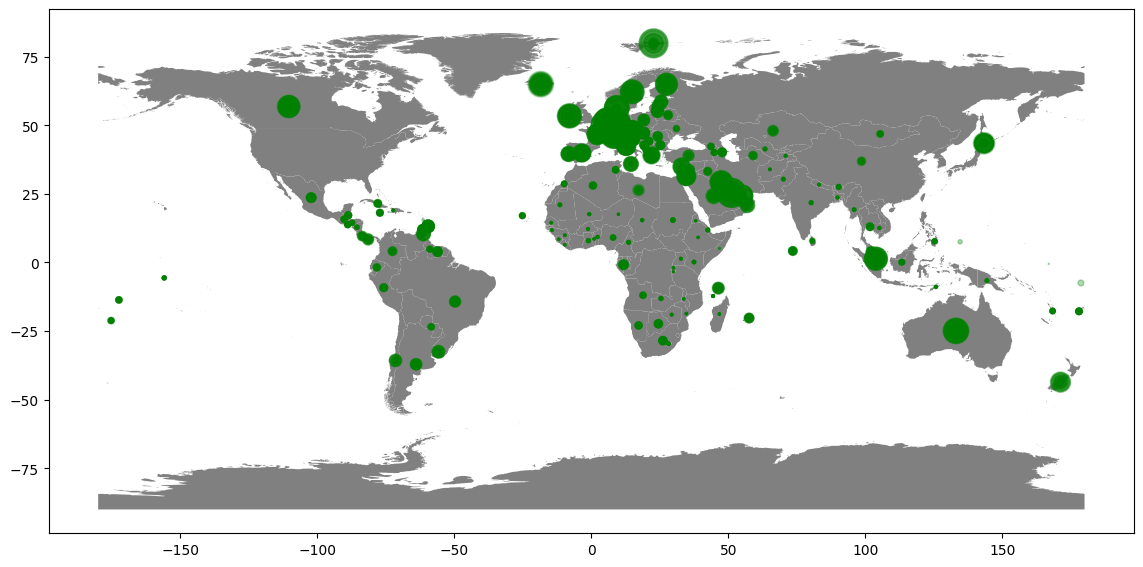

In [69]:
fig, ax = plt.subplots(figsize = (14,11))

selected_countries_gdf.plot(ax=ax, color='gray')

ax.scatter(life_df2["LONG"], life_df2["LAT"], color='green', s=life_df2['GDP']/200, alpha=0.3)

plt.show()